In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_matrix_as_heatmap_highlight_max(df, save_path, x_label, y_label, title):
    sns.set_context('talk')
    plt.figure(figsize=(10, 8))
    
    # Finding the maximum value in the DataFrame
    max_val = df.max().max()
    
    # Creating a custom annotation for each cell
    annot_array = df.applymap(lambda x: f"{x:.2f}")
    # Highlight the max value(s) with a special annotation, e.g., appending a star
    annot_array = annot_array.applymap(lambda x: x + "*" if float(x) == max_val else x)
    
    # Creating the heatmap with custom annotations
    ax = sns.heatmap(df, annot=annot_array.values, fmt="", cmap='viridis', linewidths=.5, cbar_kws={'label': 'Scale'})
    
    plt.title('Hyperparameter')
    plt.xlabel(x_label)
    plt.ylabel(y_label)    
    plt.tight_layout()
    
    plt.savefig(save_path)
    plt.close()

# Model Architecture

In [44]:
data_path = '/home/zyxue/ece594_project/results/model'
save_path = '/home/zyxue/ece594_project/figures/model'

def get_model_file_name(data,model,backbone_name):
    return f'{model}_{data}_{backbone_name}.csv'

for model in ['CoLA','Gae','Ocgnn','Dominant']:
    for backbone_name in ['GCN','GAT','GraphSAGE']:
        for data in ['disney','books','enron']:
            file_name = get_model_file_name(data=data,model=model,backbone_name=backbone_name)
            df = pd.read_csv(f'{data_path}/{file_name}')
            df.set_index('Unnamed: 0', inplace=True)
            visualize_matrix_as_heatmap_highlight_max(df, save_path=os.path.join(save_path,f'{model}_{data}_{backbone_name}.png')
                                                      ,y_label='Hidden Dim',x_label='Layers',title='')

Text(0.5, 1.0, 'Results on books')

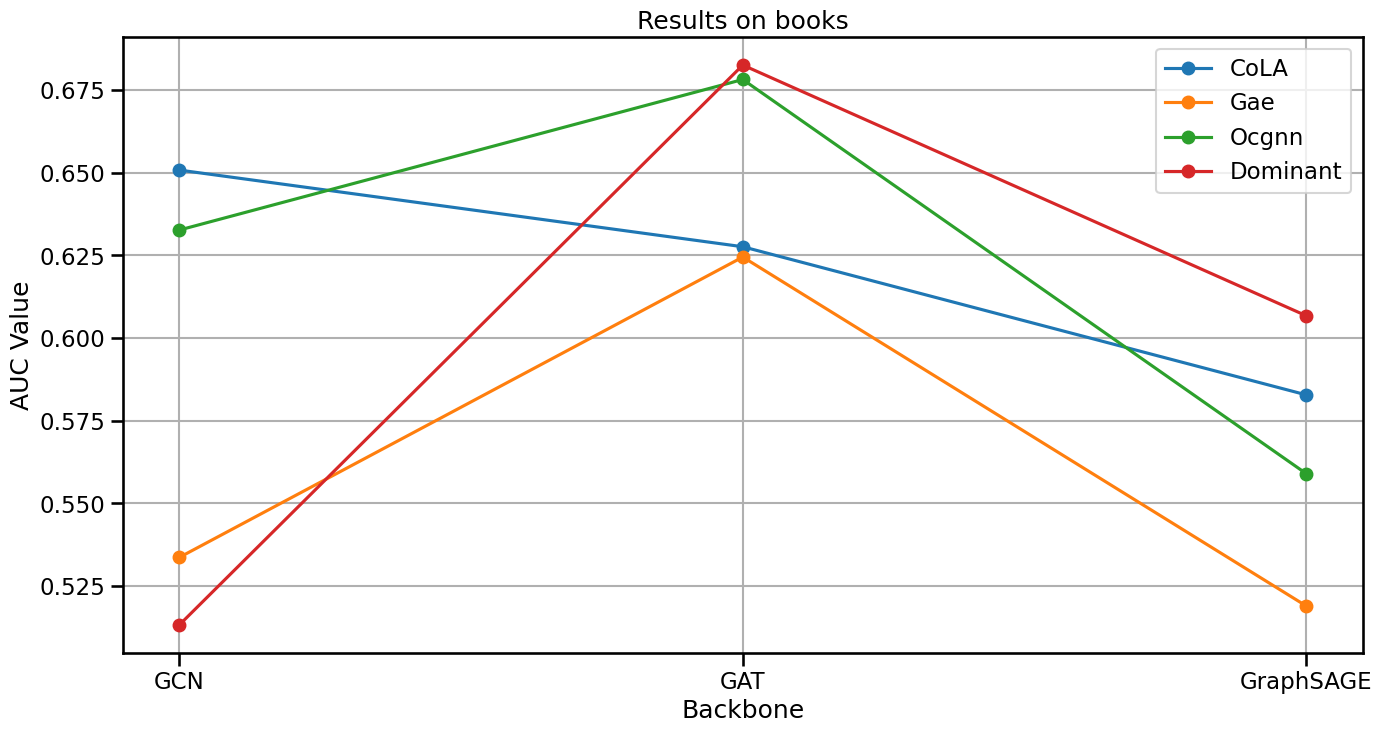

In [41]:
# Get the Max Value for Backbone
# ['disney','books','enron']
plt.figure(figsize=[16,8])
for model in ['CoLA','Gae','Ocgnn','Dominant']:
    res_lst = []
    for backbone_name in ['GCN','GAT','GraphSAGE']:
        for data in ['books']:
            file_name = get_model_file_name(data=data,model=model,backbone_name=backbone_name)
            df = pd.read_csv(f'{data_path}/{file_name}')
            df.set_index('Unnamed: 0', inplace=True)
            res_lst.append(df.max().max())
    plt.plot(['GCN','GAT','GraphSAGE'],res_lst,label=f'{model}',marker='o', linestyle='-')

plt.legend()
plt.grid()
plt.xlabel('Backbone')
plt.ylabel('AUC Value')
plt.title(f'Results on {data}')

Text(0.5, 1.0, 'Results on disney')

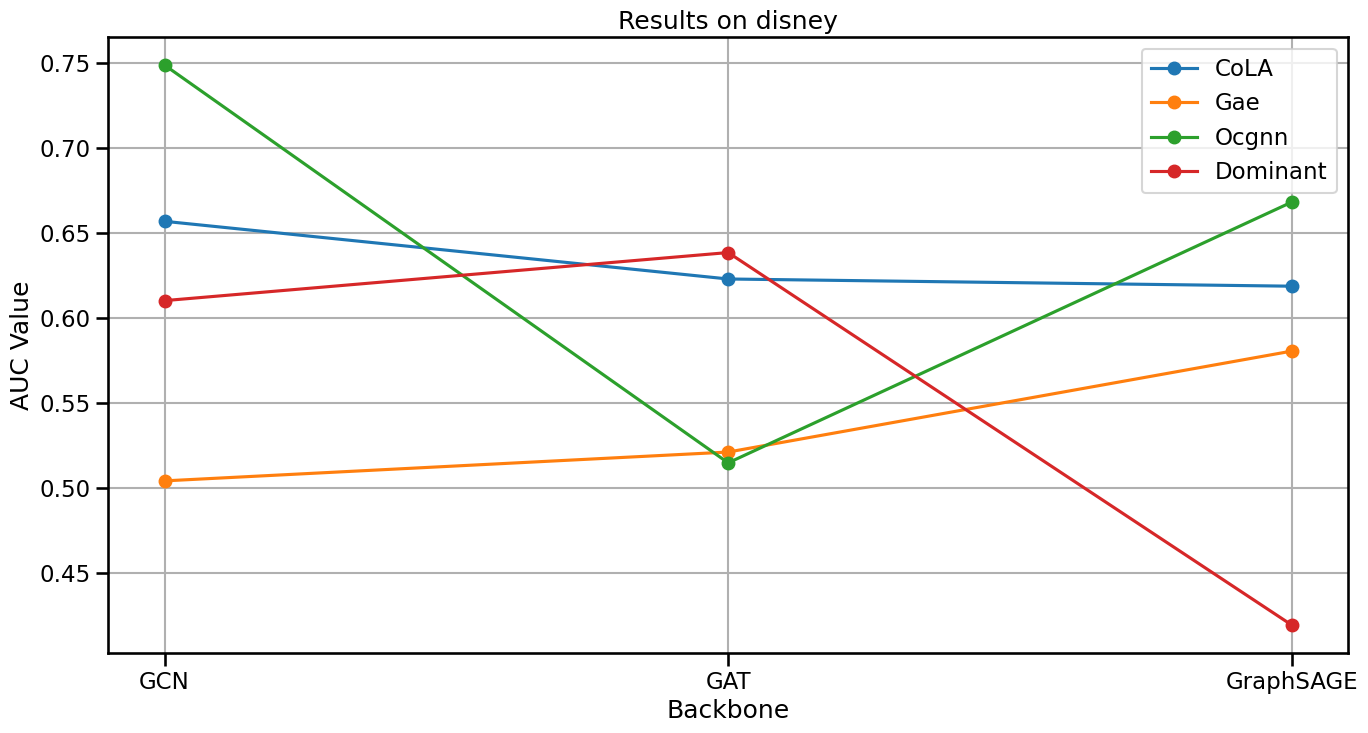

In [45]:
plt.figure(figsize=[16,8])
for model in ['CoLA','Gae','Ocgnn','Dominant']:
    res_lst = []
    for backbone_name in ['GCN','GAT','GraphSAGE']:
        for data in ['disney']:
            file_name = get_model_file_name(data=data,model=model,backbone_name=backbone_name)
            df = pd.read_csv(f'{data_path}/{file_name}')
            df.set_index('Unnamed: 0', inplace=True)
            res_lst.append(df.max().max())
    plt.plot(['GCN','GAT','GraphSAGE'],res_lst,label=f'{model}',marker='o', linestyle='-')

plt.legend()
plt.grid()
plt.xlabel('Backbone')
plt.ylabel('AUC Value')
plt.title(f'Results on {data}')

Text(0.5, 1.0, 'Results on enron')

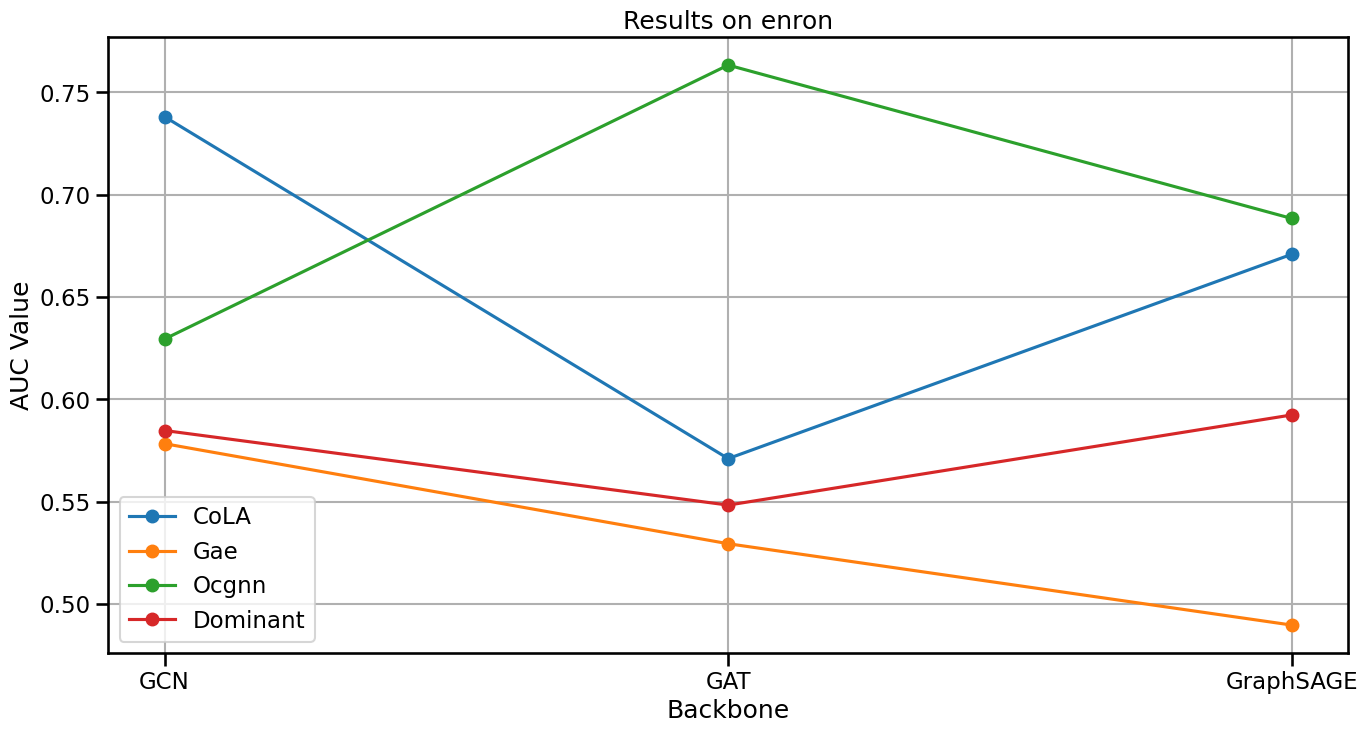

In [46]:
plt.figure(figsize=[16,8])
for model in ['CoLA','Gae','Ocgnn','Dominant']:
    res_lst = []
    for backbone_name in ['GCN','GAT','GraphSAGE']:
        for data in ['enron']:
            file_name = get_model_file_name(data=data,model=model,backbone_name=backbone_name)
            df = pd.read_csv(f'{data_path}/{file_name}')
            df.set_index('Unnamed: 0', inplace=True)
            res_lst.append(df.max().max())
    plt.plot(['GCN','GAT','GraphSAGE'],res_lst,label=f'{model}',marker='o', linestyle='-')

plt.legend()
plt.grid()
plt.xlabel('Backbone')
plt.ylabel('AUC Value')
plt.title(f'Results on {data}')

# Data

In [53]:
data_path = '/home/zyxue/ece594_project/results/data'
save_path = '/home/zyxue/ece594_project/figures/data'

def get_data_file_name(model,backbone_name):
    return f'{model}_{backbone_name}_cora_dif_num.csv'



def visualize_matrix_as_heatmap_highlight_max_for_data(df, save_path, x_label, y_label, title):
    sns.set_context('talk')
    plt.figure(figsize=(10, 8))
    
    # Finding the maximum value in the DataFrame
    max_val = df.max().max()
    
    # Creating a custom annotation for each cell
    annot_array = df.applymap(lambda x: f"{x:.2f}")
    # Highlight the max value(s) with a special annotation, e.g., appending a star
    annot_array = annot_array.applymap(lambda x: x + "*" if float(x) == max_val else x)
    
    # Creating the heatmap with custom annotations
    ax = sns.heatmap(df, fmt="", cmap='viridis', linewidths=.5, cbar_kws={'label': 'Scale'})
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)    
    plt.tight_layout()
    
    plt.savefig(save_path)
    plt.close()

for model in ['Gae','Ocgnn','Dominant']:
    for backbone_name in ['GCN','GAT','GraphSAGE']:
        file_name = get_data_file_name(model=model,backbone_name=backbone_name)
        df = pd.read_csv(f'{data_path}/{file_name}')
        df.set_index('Unnamed: 0', inplace=True)
        visualize_matrix_as_heatmap_highlight_max_for_data(df, save_path=os.path.join(save_path,f'{model}_{backbone_name}.png')
                                                    ,y_label='Number of Context Anomalous Nodes',
                                                    x_label='Number of Structure Anomalous Nodes',title=f'{model}_{backbone_name}')

In [50]:
df

,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
Unnamed: 0,,,,,,,,,,,,,,,,,,,
5,0.836482,0.863647,0.868952,0.875718,0.878678,0.880252,0.884610,0.885863,0.888496,0.890404,0.890264,0.892401,0.894477,0.895157,0.895892,0.896436,0.897507,0.896956,0.896482
10,0.807365,0.840760,0.852351,0.863500,0.870654,0.875128,0.877707,0.883158,0.883572,0.887503,0.888110,0.889252,0.888545,0.888691,0.891947,0.893030,0.893799,0.893853,0.894638
15,0.810420,0.845135,0.866573,0.882363,0.881187,0.886935,0.889661,0.890180,0.894448,0.893978,0.893261,0.895197,0.896098,0.896094,0.895046,0.896819,0.898300,0.898215,0.896460
20,0.766162,0.812320,0.836453,0.848529,0.856271,0.863523,0.870488,0.873262,0.877082,0.878659,0.880682,0.882602,0.885751,0.884992,0.885735,0.885047,0.885217,0.886533,0.887423
25,0.780722,0.832071,0.850117,0.865821,0.865155,0.871610,0.877479,0.880439,0.880574,0.881117,0.885191,0.888302,0.888593,0.888799,0.890517,0.890935,0.892720,0.894052,0.893219
30,0.774463,0.816993,0.837672,0.854869,0.860821,0.865899,0.872279,0.873477,0.876617,0.880656,0.881614,0.881616,0.882390,0.885152,0.886233,0.886165,0.887607,0.888522,0.890189
35,0.759270,0.802685,0.821521,0.842021,0.851708,0.857025,0.861959,0.866329,0.870194,0.875136,0.877324,0.880768,0.882151,0.882509,0.883411,0.885807,0.889821,0.888671,0.889679
40,0.764100,0.805171,0.824186,0.837851,0.848037,0.853299,0.857627,0.864762,0.873648,0.877165,0.880338,0.882782,0.883174,0.884990,0.885594,0.886596,0.887502,0.887345,0.886563
45,0.755746,0.797164,0.823890,0.844679,0.849177,0.856824,0.860234,0.866531,0.868680,0.871660,0.875371,0.876026,0.878060,0.880250,0.881937,0.884087,0.887554,0.887993,0.890192
